In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. OEC - Open Exoplanet Catalogue (3584, 25)

In [10]:
# Importing data

exoplanets = pd.read_csv('datasets/oec.csv')

### Dropping columns with a lot of NaNs values or not valuable information

In [4]:
# Removing columns with no valuable information for the project

exoplanets = exoplanets.drop(['DiscoveryYear', 'LastUpdated', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg', 'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'AgeGyr', 'DiscoveryMethod', 'RightAscension', 'Declination', 'HostStarAgeGyr'], axis=1)


In [5]:
exoplanets.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2271
RadiusJpt                810
PeriodDays                99
SurfaceTempK            2843
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
ListsPlanetIsOn            0
dtype: int64

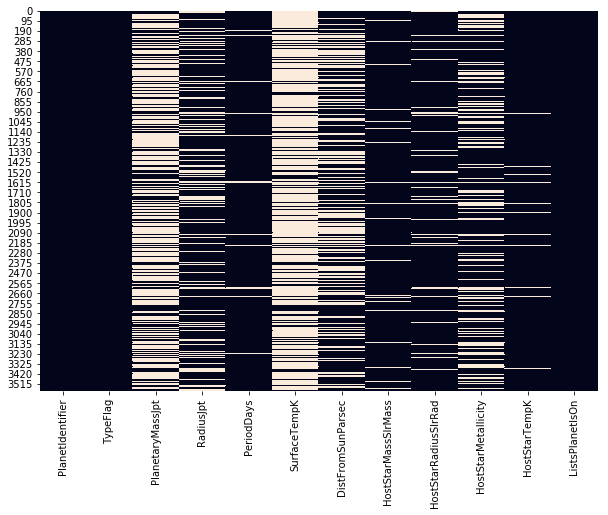

In [6]:
# Checking visually columns with high volume of NaN values left

plt.figure(figsize=(10,7))
sns.heatmap(exoplanets.isnull(), cbar = False, cmap=None)

Keeping the column PlanearyMassJpt and SurfaceTempK to see if we still can get information from it when plotting.

In [7]:
exoplanets.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SurfaceTempK,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,NaN,17.236,0.889,1.362,-0.31,5627.0,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,NaN,17.236,0.889,1.362,-0.31,5627.0,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,NaN,NaN,0.460,0.450,0.00,3584.0,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,NaN,NaN,0.460,0.450,0.00,3584.0,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,NaN,NaN,0.460,0.450,0.00,3584.0,Controversial


In [8]:
# Renaming columns

exoplanets.rename(columns={'HostStarMassSlrMass': 'star_solar_mass'}, inplace=True)
exoplanets.rename(columns={'HostStarRadiusSlrRad': 'star_solar_radius'}, inplace=True)
exoplanets.rename(columns={'HostStarMetallicity': 'star_metallicity'}, inplace=True)
exoplanets.rename(columns={'HostStarTempK': 'star_temp'}, inplace=True)

In [9]:
# Selecting rows with Kepler planets

exoplanets_kepler = exoplanets[exoplanets['PlanetIdentifier'].str.match('Kepler')]
exoplanets_kepler.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SurfaceTempK,DistFromSunParsec,star_solar_mass,star_solar_radius,star_metallicity,star_temp,ListsPlanetIsOn
5,Kepler-9 b,0,0.250,0.840,19.224180,707.2,650.0,1.07,1.02,0.12,5777.0,Confirmed planets
6,Kepler-9 c,0,0.170,0.820,39.031060,557.9,650.0,1.07,1.02,0.12,5777.0,Confirmed planets
7,Kepler-9 d,0,0.022,0.147,1.592851,1601.5,650.0,1.07,1.02,0.12,5777.0,Confirmed planets
9,Kepler-566 b,0,NaN,0.192,18.427946,NaN,NaN,0.83,0.79,-0.01,5132.0,Confirmed planets
13,Kepler-1343 b,0,NaN,0.172,3.351832,NaN,NaN,0.95,0.93,-0.16,5759.0,Confirmed planets


# 2. Kepler (9564, 50)

#### https://www.kaggle.com/nasa/kepler-exoplanet-search-results

In [10]:
# Importing data

kepler = pd.read_csv('cumulative.csv') # Characteristics of all discovered extrasolar planets (9564, 50)

In [11]:
# Removing columns with no valuable information for the project

kepler = kepler.drop(['koi_fpflag_nt', 'koi_depth', 'koi_impact', 'koi_kepmag', 'koi_slogg', 'koi_tce_delivname', 'koi_fpflag_ss', 'koi_tce_plnt_num', 'koi_insol', 'koi_model_snr', 'koi_time0bk', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_teq_err1', 'koi_teq_err2', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1',  'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'], axis=1)


In [12]:
kepler.isnull().sum()

rowid                  0
kepid                  0
kepoi_name             0
kepler_name         7270
koi_disposition        0
koi_pdisposition       0
koi_score           1510
koi_period             0
koi_duration           0
koi_prad             363
koi_teq              363
koi_steff            363
koi_srad             363
ra                     0
dec                    0
dtype: int64

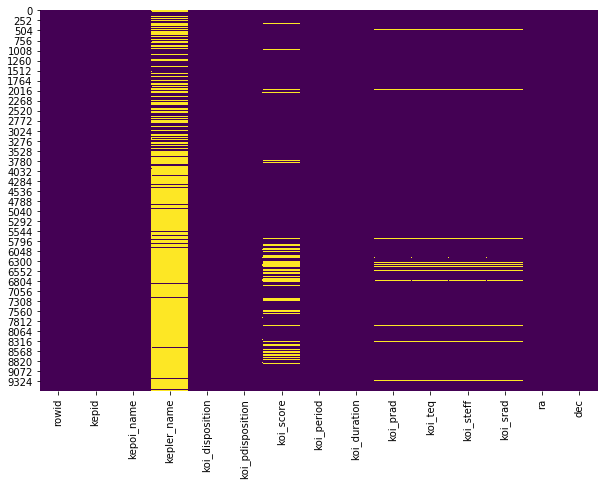

In [13]:
# Visualizing the NaN values left

plt.figure(figsize=(10,7))
sns.heatmap(kepler.isnull(), cbar = False, cmap= 'viridis')

In [14]:
kepler.rename(columns={'ra': 'right_ascension'}, inplace=True)
kepler.rename(columns={'dec': 'declination'}, inplace=True)
kepler.rename(columns={'koi_period': 'period_days'}, inplace=True)

In [15]:
# Filling NaNs left to be able to filter after

kepler = kepler.fillna(0)

# Selecting rows of Kepler planets

kepler2 = kepler[kepler['kepler_name'].str.startswith('Kepler', na=False)]
kepler2.head().sort_values(by='kepler_name', ascending=True)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,period_days,koi_duration,koi_prad,koi_teq,koi_steff,koi_srad,right_ascension,declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,2.9575,2.26,793.0,5455.0,0.927,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,4.5070,2.83,443.0,5455.0,0.927,291.93423,48.141651
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,4.134435,3.1402,2.77,1160.0,6046.0,0.972,296.28613,48.224670
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,11.094321,4.5945,3.90,835.0,6046.0,0.972,296.28613,48.224670
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,1.6545,2.75,1406.0,6031.0,1.046,288.75488,48.226200


In [16]:
kepler.to_csv('kepler_clean.csv')

# Summary

In [17]:
exoplanets.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SurfaceTempK,DistFromSunParsec,star_solar_mass,star_solar_radius,star_metallicity,star_temp,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,NaN,17.236,0.889,1.362,-0.31,5627.0,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,NaN,17.236,0.889,1.362,-0.31,5627.0,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,NaN,NaN,0.460,0.450,0.00,3584.0,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,NaN,NaN,0.460,0.450,0.00,3584.0,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,NaN,NaN,0.460,0.450,0.00,3584.0,Controversial


In [18]:
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,period_days,koi_duration,koi_prad,koi_teq,koi_steff,koi_srad,right_ascension,declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,2.95750,2.26,793.0,5455.0,0.927,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,4.50700,2.83,443.0,5455.0,0.927,291.93423,48.141651
2,3,10811496,K00753.01,0,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,1.78220,14.60,638.0,5853.0,0.868,297.00482,48.134129
3,4,10848459,K00754.01,0,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,2.40641,33.46,1395.0,5805.0,0.791,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,1.65450,2.75,1406.0,6031.0,1.046,288.75488,48.226200
